In [1]:
!pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5778 - loss: 1.1681 - val_accuracy: 0.8172 - val_loss: 0.5167
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8290 - loss: 0.4946 - val_accuracy: 0.8313 - val_loss: 0.4735
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8425 - loss: 0.4499 - val_accuracy: 0.8313 - val_loss: 0.4656
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8467 - loss: 0.4387 - val_accuracy: 0.8441 - val_loss: 0.4546
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8503 - loss: 0.4282 - val_accuracy: 0.8423 - val_loss: 0.4481
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8562 - loss: 0.4137 - val_accuracy: 0.8471 - val_loss: 0.4364
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8567 - loss: 0.4067 - val_accuracy: 0.8473 - val_loss: 0.4314
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8562 - loss: 0.4015 - 

In [13]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


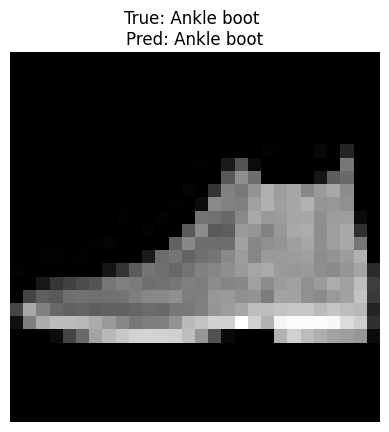

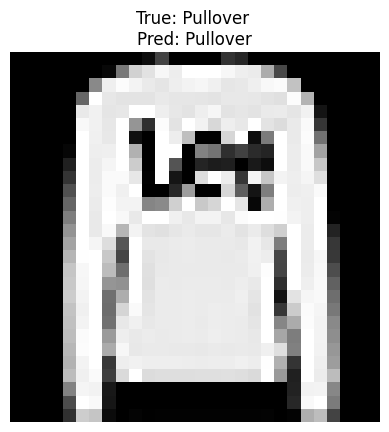

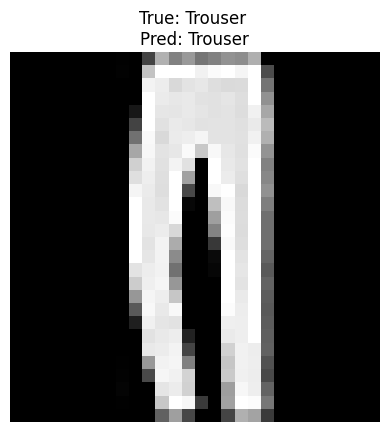

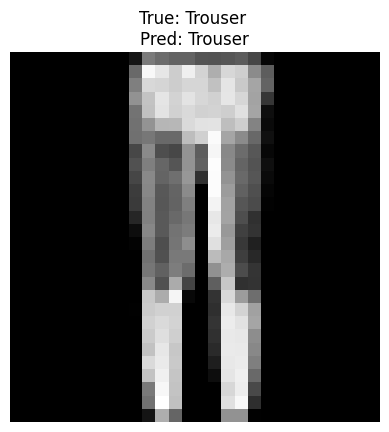

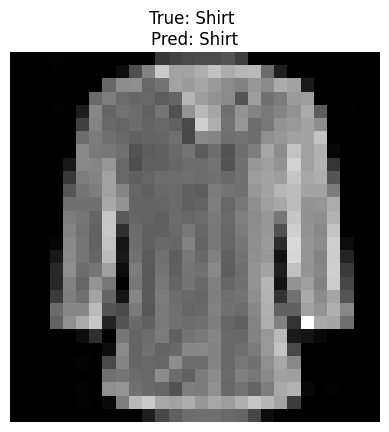

In [14]:
import matplotlib.pyplot as plt

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def plot_image_with_label(image, true_label, predicted_label):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]} \nPred: {class_names[predicted_label]}")
    plt.show()

for i in range(5):
    plot_image_with_label(x_test[i], y_test[i].argmax(), predictions[i].argmax())

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)